In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
#Load data
columnsName = ['Feature1','Feature2']
f = open("classA.txt", "r")
classA = pd.DataFrame(np.array(f.read().split()).astype('float64').reshape(-1,2),columns = columnsName)
f = open("classB.txt", "r")
classB = pd.DataFrame(np.array(f.read().split()).astype('float64').reshape(-1,2),columns = columnsName)

In [4]:
#Merge data
classMerge = pd.concat([classA,classB], keys=['A', 'B']).reset_index().drop('level_1', axis=1).rename(columns = {'level_0': 'Class'})

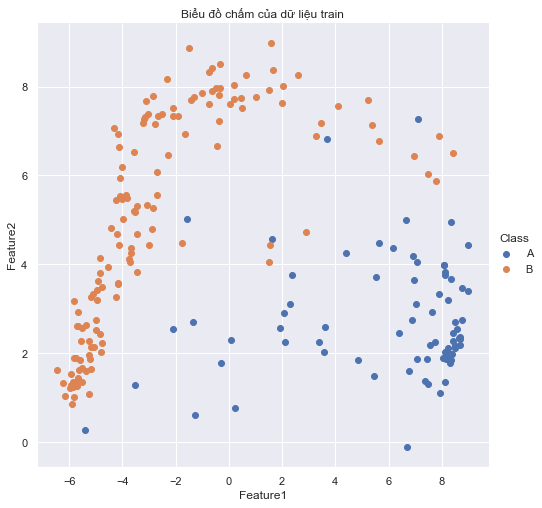

In [5]:
#Plot data
sns.set()
sns.FacetGrid(classMerge, hue="Class", height=7).map(plt.scatter,"Feature1","Feature2",).add_legend()
plt.title('Biểu đồ chấm của dữ liệu train')
plt.show()

In [6]:
#Split train and test
train_set, test_set = train_test_split(classMerge, train_size=0.7)
print("Số lượng của tập train là :",len(train_set.index))
print("Số lượng của tập train là :",len(test_set.index))

Số lượng của tập train là : 151
Số lượng của tập train là : 65


In [7]:
#Build classifier functions
h = 0.5

def phi(x):
  return np.exp(-np.transpose(x)@x)/2

def PW(X,data_train):
  scores_list = []
  for p in train_set.groupby('Class'):
    score = 0
    for x in p[1][['Feature1','Feature2']].to_numpy():
      score+=phi((X-x.reshape(-1,1))/h)
    scores_list.append(score)
  return np.argmax(scores_list)

In [8]:
#Confusion matrix
prediction = ["A" if PW(np.array([x,y]).reshape(-1,1),train_set)==0 else "B" for x, y in test_set[["Feature1","Feature2"]].values]
label = list(test_set['Class'].values)
print(pd.DataFrame(confusion_matrix(label, prediction), index=['Class A', 'Class B'], columns=['Class A', 'Class B']))

         Class A  Class B
Class A       22        3
Class B        3       37


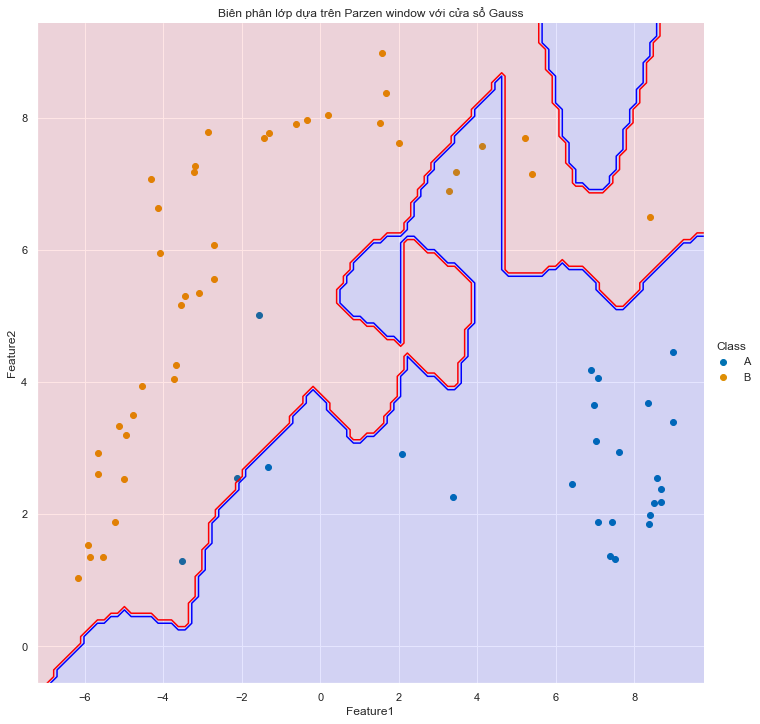

In [9]:
#Plot with boundary contours
N = 100
maxv = classMerge[["Feature1","Feature2"]].max().values
minv = classMerge[["Feature1","Feature2"]].min().values
len = maxv - minv
X = np.linspace(minv[0]-len[0]*0.05, maxv[0]+len[0]*0.05, N)
Y = np.linspace(minv[1]-len[1]*0.05, maxv[1]+len[1]*0.05, N)
X, Y = np.meshgrid(X, Y)

#Configure plot
color_list = ['Blues','Reds']
g = sns.FacetGrid(test_set, hue="Class", height=10, palette = 'colorblind', hue_order=["A","B"]).map(plt.scatter,"Feature1","Feature2",).add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [PW(np.array([xx,yy]).reshape(-1,1),train_set) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
# zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1),mu_list, std_list, pi_list) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('blue','red'))
my_ax.contour( X, Y, Z, 1, alpha = 1, colors = ('blue','red'))

# Addd axis and title
my_ax.set_xlabel('Feature1')
my_ax.set_ylabel('Feature2')
my_ax.set_title('Biên phân lớp dựa trên Parzen window với cửa sổ Gauss')
plt.show()